# Lab 4: Unsupervised Learning

In this lab, we'll be clustering our participants using unsupervised learning, to discover the sturcture in our dataset.

First, let's start with some imports, as usual:

In [1]:
import os, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords

/home/marlene/anaconda3/envs/nlp_workshop/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/home/marlene/anaconda3/envs/nlp_workshop/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. Preparing and exploring the Data

This time, we'll start with the depression dataset from our trinagles data. Load ```'triangles_depression.csv'``` from the ```../data``` directory as before. Use ```.shape``` and ```.head()``` to see if the data looks alright, and to check the number of features and participants:

In [2]:
#Code here.
data_path_d = os.path.join(os.getcwd(), '../data', 'triangles_depression.csv')
data_d = pd.read_csv(data_path_d,index_col=0)
data_d.head()

,det,er,simpelthen,at,den,lille,laver,noget,og,s,...,spids,omsorg,blokere,billedet,sort,hvirvler,foroven,glider,oppe,label
0,4.0,2.0,0.0,2.0,18.0,0.0,0.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Controls
1,4.0,2.0,0.0,5.0,6.0,0.0,0.0,5.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Controls
2,12.0,10.0,0.0,9.0,12.0,6.0,0.0,6.0,16.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Controls
3,8.0,2.0,0.0,0.0,3.0,1.0,0.0,3.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Controls
4,5.0,4.0,0.0,0.0,18.0,2.0,0.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Controls


In [3]:
data_d.shape

(109, 870)

Let's see how our classes are distributed. Use <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">```sns.countplot()```</a> to generate a bar plot showing the distribution of ```data_d['label']```. What groups are there? How many are in each group (*hint: use ```.value_counts()```*)?

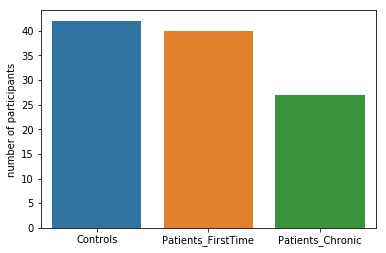

In [4]:
# Code here.
ax = sns.countplot(data_d['label'])
ax.set_ylabel("number of participants")
ax.set_xlabel("")
plt.show()

In [5]:
data_d['label'].value_counts()

Controls              42
Patients_FirstTime    40
Patients_Chronic      27
Name: label, dtype: int64

*Take notes here:*

Now, like in lab 2, split the data into a feature matrix ```X``` and a target label vector ```y```. Use the ```.shape``` attribute to check the dimensionality. Why do we not need to do any train-test splitting in this case?

In [6]:
#Code here.
X = data_d.drop("label",axis=1).values
y = data_d["label"].values
print(X.shape, y.shape)

(109, 869) (109,)


*Take notes here:*

## 2. k-means clustering

Now, we are ready to use the k-means clustering algorithm. Use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">```KMeans()```</a> class for this. Let's first assume we know that there are 3 distinct groups of people in our dataset - patients with a first episode of depression, chronically depressed patients and controls. So we set the number of clusters to 3. To make your experiment repeatable, set the ```random_state = 12``` (*think about: what would happen if you didn't set a random state?*). Make sure you only fit KMeans to X, not y.

In [7]:
#Code here.
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

Now we want to evaluate how good our clustering is, by comparing the amount of overlap between the clusters found with unsupervised learning and our original labels. sklearns <a href="http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.adjusted_rand_score.html">```adjusted_rand_score()```</a> function will do this for us. Read its documentation and try to understand what it does; then call it on ```y``` and the ```.labels_``` attribute of your KMeans() object (that you fit above). How good is the result?

In [8]:
#Code here.
print("Adjusted rand score: {}".format(adjusted_rand_score(y,kmeans.labels_)))

Adjusted rand score: -0.017090764618489223


*Take notes here:*

Let's visualise what's going on. For each cluster, plot its distribution of classes (*hint: you may use ```sns.countplot``` again, or something else if you like*). What do you observe? How do classes and clusters match up? Can you think of any reasons for this?

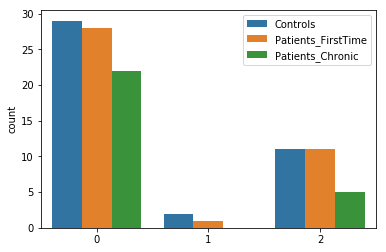

In [9]:
#Code here.
sns.countplot(kmeans.labels_, hue=y)
plt.show()

*Take notes here:*

The distrubtion of classes is the same in all clusters - pretty random clustering!

## 3. Feature Engineering

Again like in lab 2, let's do some feature engineering. By now, you should have encountered some techniques to select features or reduce feature dimensionality. Try at least one thing to modify your features, in order to enhance the performance of the k-means clustering algorithm, e.g.:

- remove stopwords
- transform features into a lower-dimensional space, using PCA (see lab 3, XX?) [A]
- select features with high information gain, using a decision tree (see lab 2, 9. - just do this on the full dataset for now, although this is technically cheating. Really, you should be using a held-out set to test the quality of the feature selection) [A]

In [10]:
#Code here.
# removing stopwords
def remove_stopwords(df):
    for col in df.columns:
        if col in stopwords.words('danish'):
            df.drop(col,inplace=True,axis=1)
    return df

data_d = remove_stopwords(data_d)
X_nostop = data_d.drop("label",axis=1).values
y_nostop = data_d["label"].values
print("Feature dimensionality after removing stopwords: {}".format(X_nostop.shape))

#PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
print("Feature dimensionality after PCA: {}".format(X_pca.shape))

#feature selection
dt = DecisionTreeClassifier()
dt.fit(X,y)
features = data_d.columns[np.where(dt.feature_importances_ != 0)]
#create a new dataset from those features
X_select = data_d[features].values
print("Feature dimensionality after feature selection: {}".format(X_select.shape))

Feature dimensionality after removing stopwords: (109, 798)
Feature dimensionality after PCA: (109, 20)
Feature dimensionality after feature selection: (109, 19)


Again, fit KMeans (3 clusters, ```random_state = 12```) to this data and print the adjusted rand index for this clustering. Has the clustering improved? Take some notes and/or make a plot if you like, to help you udnerstand what's going on inside those functions/objects.

In [11]:
#Code here.
#run kmeans without stopwords
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(X_nostop)
print("Adjusted rand score without stopwords: {}".format(adjusted_rand_score(y,kmeans.labels_)))

#run kmeans with 20 dimensions
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(X_pca)
print("Adjusted rand score with PCA: {}".format(adjusted_rand_score(y,kmeans.labels_)))

#run kmeans with selected features
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(X_select)
print("Adjusted rand score with selected features: {}".format(adjusted_rand_score(y,kmeans.labels_)))

Adjusted rand score without stopwords: -0.007419537062687425
Adjusted rand score with PCA: -0.017090764618489223
Adjusted rand score with selected features: -0.011509135280656866


## 3. Finding k

Let's assume now we don't already *know* how many classes there are, but we want to *discover* an optimal number of clusters. For example, we might be unsure about whether to consider first episode and chronic patients as part of the same group, or two different groups. We might also not know what kinds of different people we have at all, or we might want to find out if there are different stages of depression that manifest themselves more gradually - maybe there are 4, or 5 different subgroups?

We'll try to discover an "optimal" number of k by looking at the scree plot (take "optimal" with a grain of salt here - this is a very data-driven approach that you should not take more seriously than your top-down knowledge on a specific subject!).

Run the following steps:
1. Create a range of values for k to explore, from 1 to 10
2. Create an array to store the sum squared distances with each k (*hint: this is also called "intertia"*)
3. Iterate over your k-values, fit a KMeans object to X, using each k (set the ```random_state = 0```), and store the intertia
4. Make a plot (e.g., using ```sns.pointplot```) of k-values versus intertia
5. Find the "ellbow"

What do you observe? What is the "optimal" number of clusters? Does this match your expectation?

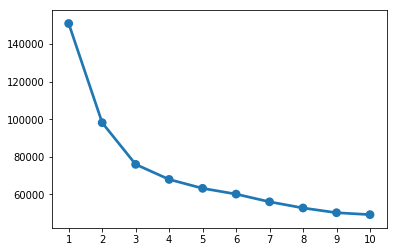

In [12]:
# Code here.
#prepare the ranges
k_values = np.arange(1,11)
scores = np.zeros((10,))

#iterate over possible k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    scores[k-1] = kmeans.inertia_

#plot values
sns.pointplot(k_values,scores)
plt.show()

*Take notes here:*

## 4. GMM-clustering

Let's try some GMM-clustering now. Before you start, think about how k-means is similar to clustering with GMMs. What's the difference between the two approaches? Do you expect the GMM clustering to work better, or worse, than k-means?

*Take notes here:*

Now, let's make a Gaussian Mixture Model. Use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">```GaussianMixture()```</a> class. Again, let's start with 3 components (```random_state=1```). Fit the model and predict a cluster for each data point in X (*why are we using the training data here, again?*). Then print the adjusted rand score between y and the predicted clusters. Do you see any improvements?

Again, plot the predicted clusters versus true labels.

In [13]:
# Code here
gmm = GaussianMixture(n_components=3, random_state=1)
gmm.fit(X)
clusters=gmm.predict(X)
print("Adjusted Rand Score with GMMs: {}".format(adjusted_rand_score(y,clusters)))

Adjusted Rand Score with GMMs: -0.011585711232786915


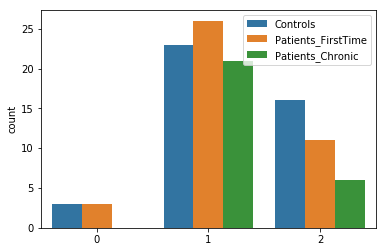

In [14]:
#plot
sns.countplot(clusters, hue=y)
plt.show()

*Take notes here:*

## 5. Big(ger) data! [A]

The dataset we've been working with is fairly small - in fact, too small for unsupervised learning. Further, the task (triangles) is pretty constrained, and may not reveal all the variety in language use by different people. A bigger dataset, with more variety, is the <a href="https://www.kaggle.com/c/fake-news/data">Kaggle Fake News challenge dataset</a>. It originally contains ca. 150k news articles. I've pre-processed the first ca. 5k articles for you, in much the same way as our triangles data. The labels are "0 = reliable" and "1 = unreliable". 

Load the dataframe from ```../data/fakenews.csv``` into a new variable called ```newsdata```. Examine the shape and head of the dataframe to see what it looks like. How many observations are there? How many features?

In [15]:
#Code here.
data_path = os.path.join(os.getcwd(), '../data', 'fakenews.csv')
newsdata = pd.read_csv(data_path,index_col=0)
newsdata.shape

(5000, 4936)

In [16]:
newsdata.head()

,chief,mounting,may,clean,his,likely,lost,model,range,limits,...,putins,successor,sponsored,painted,experiment,confront,coal,pause,requested,recipe
0,0.0,0.0,4.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now use the clustering techniques you have learned about to detect groups of articles in this dataset. Choose either k-means or GMMs to cluster the data. What number of clusters/mixtures do you choose? Do clusters and labels line up well? How many subgroups of articles do you find, using a scree test? Use plots and evaluation metrics and reflect on your findings.

In [17]:
#Code here.
#remove stopwords
#newsdata = remove_stopwords(newsdata)
#prepare X and y
y = newsdata["label"].values
X = newsdata.drop('label',axis=1).values
print(X.shape, y.shape)

(5000, 4935) (5000,)


Adjusted rand score for fakenews dataset: 0.00021881994657405875


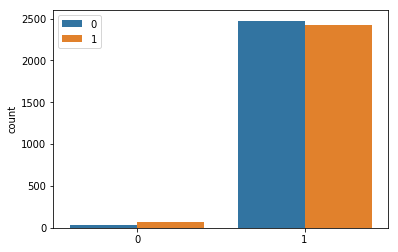

In [18]:
#run kmeans
kmeans = KMeans(n_clusters=2, random_state=12)
kmeans.fit(X)
print("Adjusted rand score for fakenews dataset: {}".format(adjusted_rand_score(y,kmeans.labels_)))

#plot the relationship
sns.countplot(kmeans.labels_, hue=y)
plt.show()

In [ ]:
#find the optimal k
#prepare the ranges
k_values = np.arange(1,11)
scores = np.zeros((10,))

#iterate over possible k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    scores[k-1] = kmeans.inertia_

#plot values
sns.pointplot(k_values,scores)
plt.show()

In [ ]:
#run kmeans with optimal k
best_k=3
kmeans = KMeans(n_clusters=best_k, random_state=12)
kmeans.fit(X)
print("Adjusted rand score for fakenews dataset: {}".format(adjusted_rand_score(y,kmeans.labels_)))

#plot the distribution over the classes
sns.countplot(kmeans.labels_, hue=y)
plt.show()

*Take notes here:*
- Generally doesn't rly work that well
- Maybe words aren't enough as features, and the data is still to small for unsupervised clustering
- In the last plot: cluster 2 probably captures some outliers that screw up the grouping before 

## 6. Clustering word vectors [A]

Maybe it is a bit much to ask of our model, to discover groups of patients and controls or news articles all on its own, with no supervision and only a bag of words as features. Let's try clustering something that seems intuitively more "groupable": Let's try and discover different classes/categories of words, using our word vectors from lab 3.

First, load the word vector dataset from lab 3 (using the ```load_vectors()``` function below on ```../data/word_vectors.vec```). Check the head and dimensionality of the resulting dataframe.

In [ ]:
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = tokens[1:]
    data = pd.DataFrame.from_dict(data,orient="index")
    return data

In [ ]:
#Code here
#load the word vectors
data_path = os.path.join(os.getcwd(), '../data', 'word_vectors.vec') # just using the first 10k fastText words!
worddata = load_vectors(data_path)
print(worddata.shape)
worddata.head()

Now let's do some word clustering.
1. Prepare a feature matrix X from the dataframe above
2. Define a range of k-values to explore
3. Fit KMeans to X, using these k-values. Store the resulting mean squared error for each k. (Use ```random_state=0```)
4. Make a scree plot and determine the optimal k
5. Fit k-means again with the optimal k

In [ ]:
# Code here.
#prepare X
X = worddata.values

#prepare the ranges
k_values = np.arange(5,50,5)
scores = np.zeros((len(k_values),))

#iterate over possible k
for i,k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    scores[i] = kmeans.inertia_

#plot values
sns.pointplot(k_values,scores)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X)

Finally, let's explore one of the clusters. Let's just use cluster one - have a look at the words it contains:
1. Get the label of each datapoint from your KMeans object (check out the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">documentation</a> to see which attribute to use). Add this as a new column to your dataframe.
2. Find the words where label==1 and display them. (*Hint: Pick out the matching rows using boolean logic. You can use .index to see the word associated with a particular row in the dataframe.*)

Do you see any pattern? (Try a few other clusters as well, and determine whether you think there is any pattern in this clustering.)

In [ ]:
#Code here.
worddata['label'] = kmeans.labels_
for w in worddata[worddata['label']==12].index:
    print(w)

*Take notes here.*

## 7. Findings

Think about your findings. What have they taught you?
- What are the advantages of unsupervised methods? 
- Which approach worked better - k-means or GMM?
- What are the challenges with unsupervised learning?
- Were the assumptions met?
- Have you learned anything about depression/schizophrenia?
- Do you think people with depression/schizophrenia can be clustered using only words from triangles descriptions, generally? What do you think we would need to change to make better predictions?
- Can unsupervised learning help you discover anything new about your data?

*Take some notes here:*